# Keypoint detection, Feature description and matching

In this notebook, I demonstrate how to use OpenCV's feature detection, description and matching framework.

![Matches](./output.gif)

## Package inclusion for Python

In [1]:
%matplotlib inline

import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
# Open the default camera (see the 0 below)
webcam = cv.VideoCapture(0)

## Open two images

### Any error? Is the data loaded?

In [3]:
if !webcam.isOpened():
    raise Exception("OpenCV found no webcam, the program will terminate");

Text(0.5, 1.0, 'Right Image')

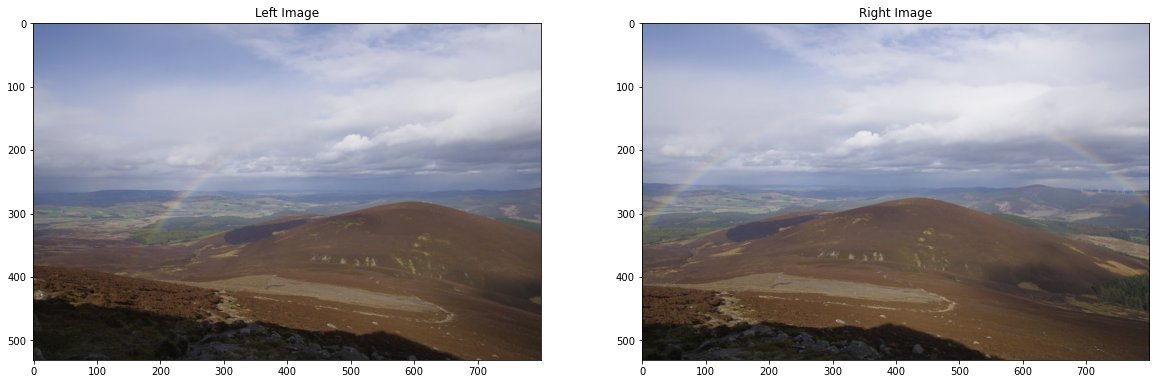

In [4]:
ret_val, reference_image = camera.read()

if reference_image is None: 
    raise Exception("Could not get the image from the camera")

reference_image_blurred = cv2.medianBlur(reference_image, 5)

In [ ]:
detector = cv2.ORB.create()
extractor = cv2.ORB.create()
matcher = cv2.BFMatcher(cv2.NORM_HAMMING)

keypoints1 = detector.detect(reference_image_blurred)
descriptors1 = extractor.compute(reference_image_blurred, keypoints1)

def detectAndMatch(value, img2):
    
    global detector, extractor, descriptors1
    
    keypoints2 = detector.detect(img2)
    descriptors2 = extractor.compute(img2, keypoints2)
    matches = matcher.match(descriptors1[1], descriptors2[1])
    
    max_dist = -sys.float_info.max
    min_dist = sys.float_info.max

    for i in range(len(matches)):

        dist = matches[i].distance
        min_dist = min(min_dist, dist)
        max_dist = max(max_dist, dist)
        
    good_matches = []
    threshold_distance = min_dist + (max_dist - min_dist) * value / 100.0

    for i in range(len(matches)):

        dist = matches[i].distance

        if dist < threshold_distance:
            good_matches.append(matches[i])

    return cv2.drawMatches(reference_image_blurred, keypoints1, img2, keypoints2, good_matches, None)

In [15]:
cv2.namedWindow('matches', cv2.WINDOW_AUTOSIZE)
cv2.createTrackbar("Threshold: ", "matches", 50, 100, None)

key = -1

while key != 27 and key != ord('q'):

    ret_val, test_image = camera.read()

    if test_image is None: 
        raise Exception("Could not get the image from the camera")

    test_image_blurred = cv2.medianBlur(test_image, 5)
    
    # Match keypoint
    slider_value = cv2.getTrackbarPos("Threshold: ", "matches")
    img_matches = matchKeypoints(slider_value, test_image_blurred)
    imshow("matches", img_matches)

27

When we increase the threshold there are wrong matches (called false positives).

![Matches with false positives](match2.png)
    
When we decrease the threshold the false positives disapear as only strong matches remain.

![Strong matches](match3.png)

In [16]:
cv2.destroyAllWindows()